## numpy

### ndarray

In [1]:
import numpy as np
import pandas as pd 

In [ ]:
data = np.random.randn(2,3)
print(data)

#形状
print(data.shape)

#数据类型
print(data.dtype)

#### creating ndarrays

In [ ]:
#通过list创建
arr1 = np.array([1,2,3,4])
arr1

In [ ]:
np.zeros(5)

In [ ]:
np.zeros((3,4))

In [ ]:
#arange
np.arange(15)

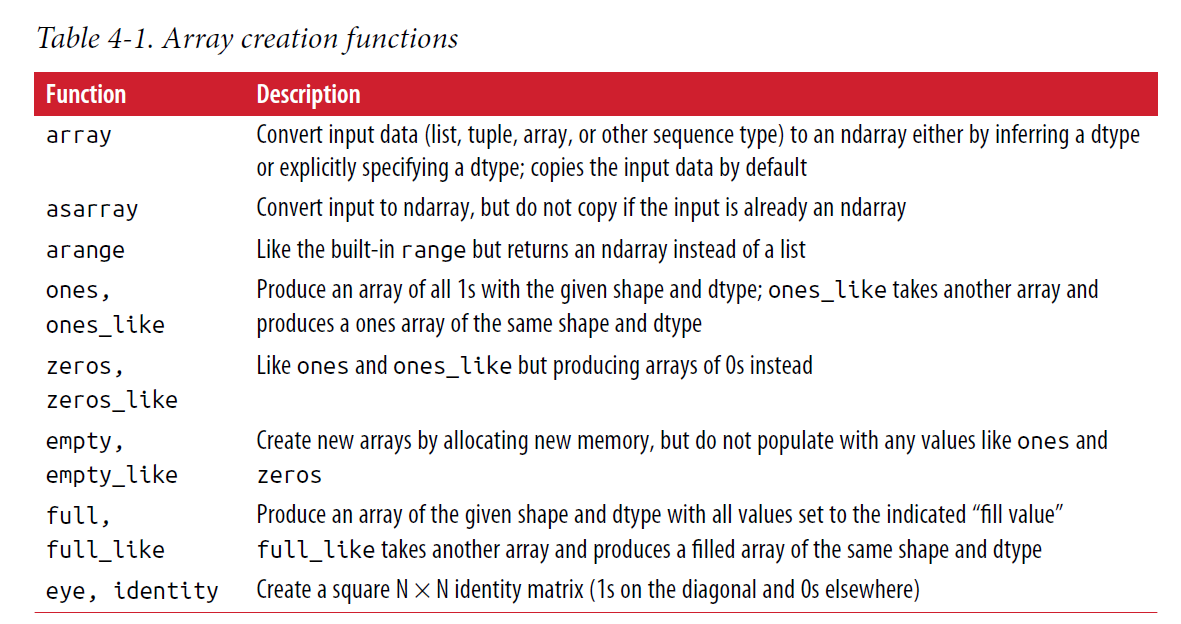

In [ ]:
np.eye(5)

#### data type

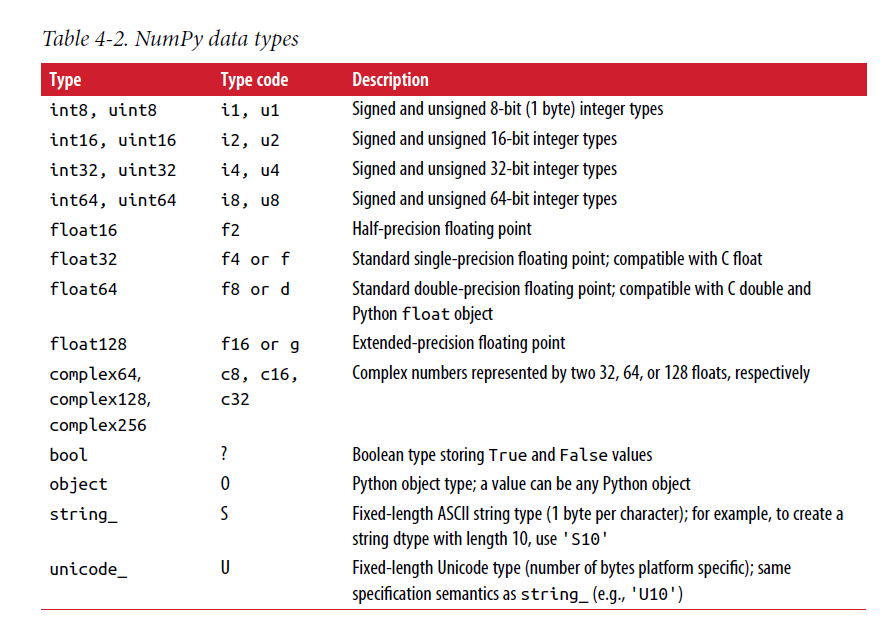

In [ ]:
np.arange(5,dtype=np.float64)

#### indexing and slicing

In [ ]:
#ndarray的切片赋值不会赋值，会直接修改原array
arr = np.arange(10)
print(arr)

arr_slice = arr[2:5]
print(arr_slice)

arr_slice[1] = 100
print(arr_slice)
print(arr)
#100直接反应到了原array上去，如果想要复制，.copy

In [ ]:
#多为切片
arr2d = np.arange(1,10).reshape(3,3)
print(arr2d)
print(arr2d[0:2])
print(arr2d[0:2,0:2])

In [ ]:
arr2d[1,1:3]

In [ ]:
arr2d[:,:1]

In [ ]:
arr2d[:,0]#注意区别

In [ ]:
arr2d[1,:2]

In [ ]:
arr2d[1:2,:2]

#### fancy indexing

In [ ]:
arr = np.arange(32).reshape(8,4)

In [ ]:
arr

In [ ]:
#直接取想要的行，传入一个list
arr[[0,2,4]]

In [ ]:
arr[:,[0,2]]

In [ ]:
arr[[1,3,5,7],[1,2,3,0]]
#1,1、3,2、5,3、7,0

### Universal functions

In [ ]:
np.sqrt()
np.exp()
np.maximum(x,y)


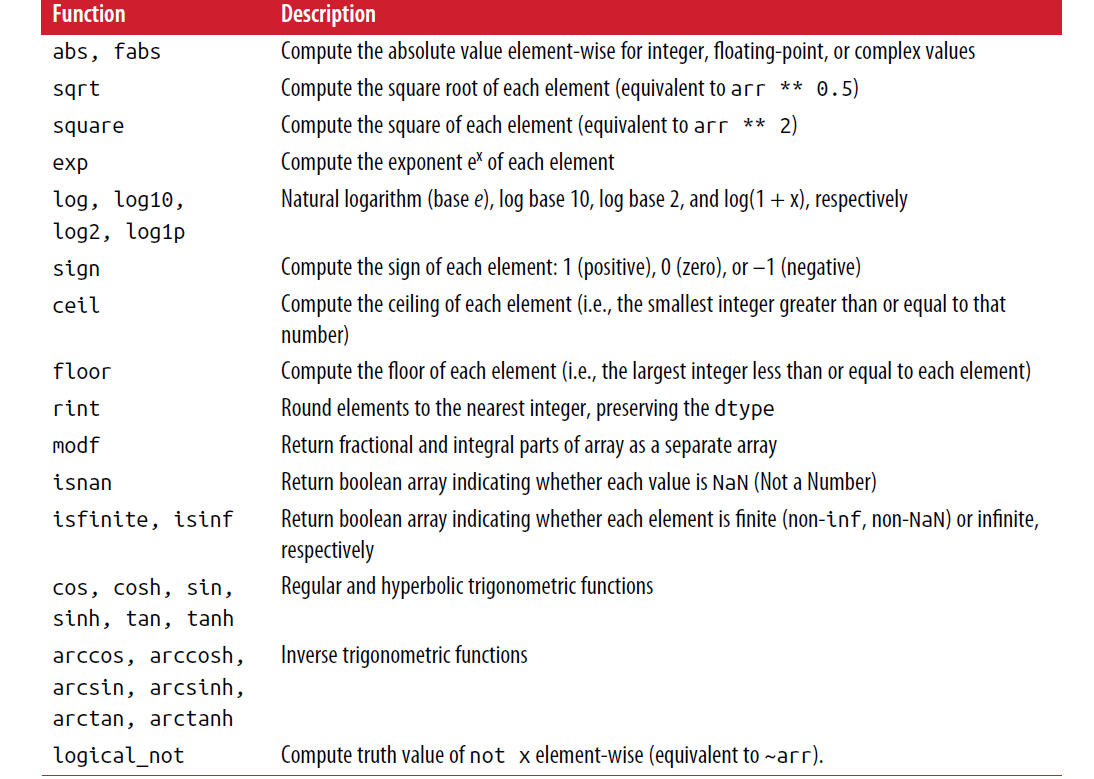

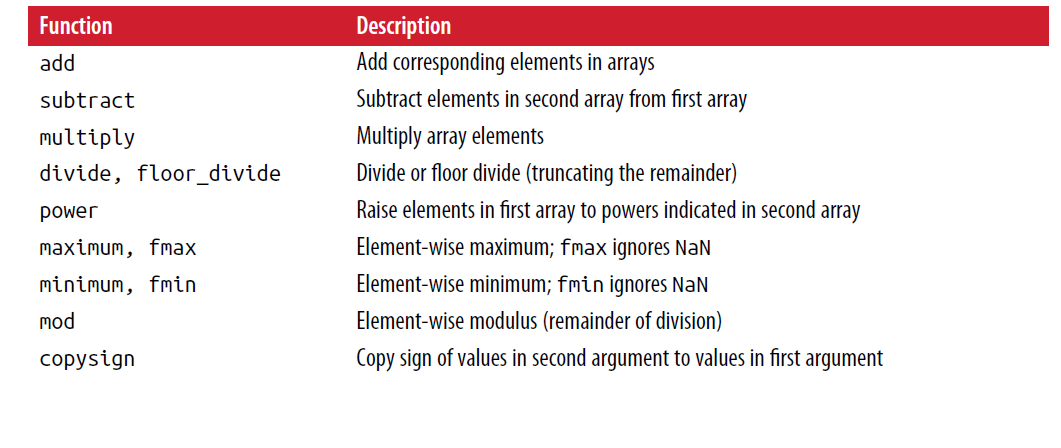

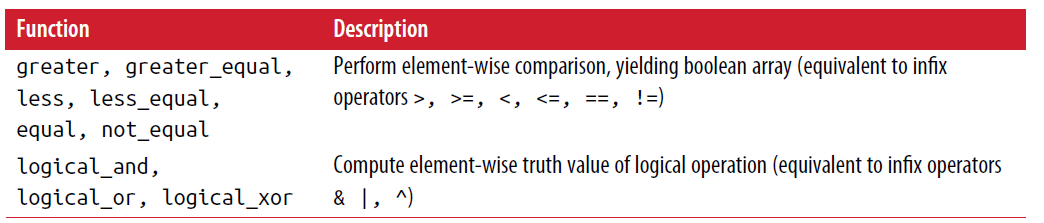

### Array-oriented

#### meshgrid

In [ ]:
x = np.arange(1,4)
y = np.arange(-5,0)

In [ ]:
xs, ys = np.meshgrid(x, y)
xs

In [ ]:
ys 

#### conditional logic

In [ ]:
arr = np.random.randn(3,3)
arr

In [ ]:
np.where(arr > 0,1,-1)

In [ ]:
np.where(arr>0,arr,-1)#负数用-1，其他不变

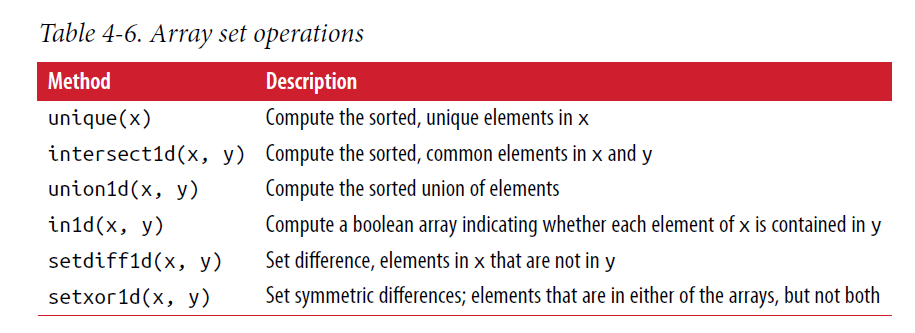

#### basic statistical methods

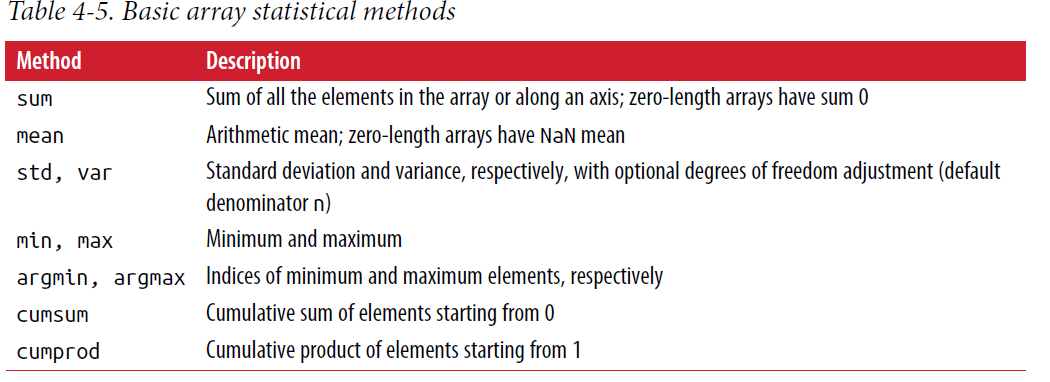

#### random number

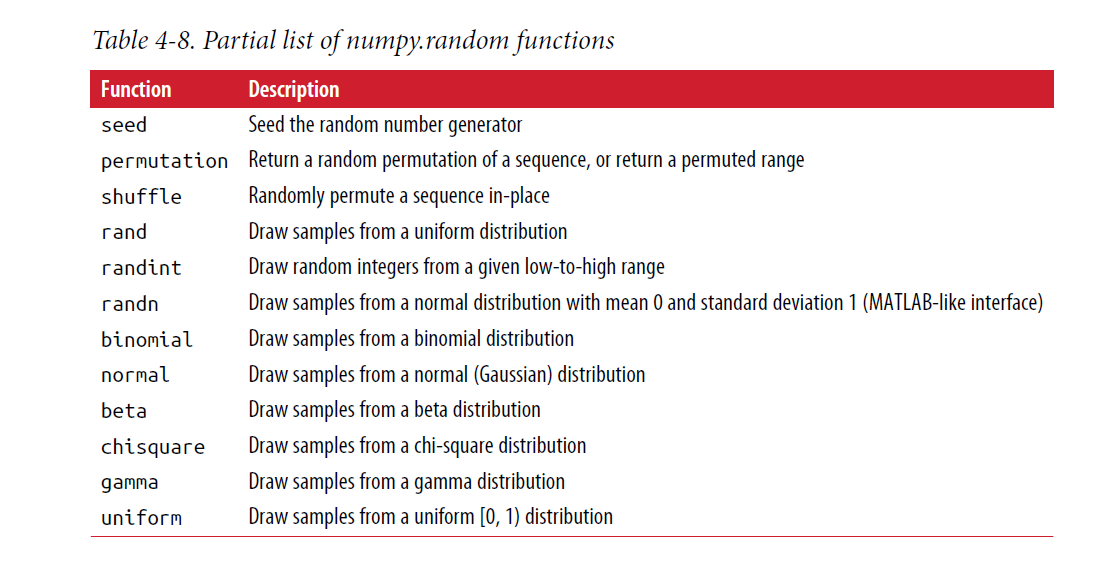

## pandas

### Series

In [ ]:
seri = pd.Series([9,-5,3,1])
print(seri)
print(seri.index)
print(seri.values)

In [2]:
#通过dict创建
ddata = {'a':100,'b':200,'c':300}
ind = ['b','a','e']
obj3 = pd.Series(ddata, index = ind)
obj3
#e并不是key，所以nan

b    200.0
a    100.0
e      NaN
dtype: float64

In [3]:
pd.isnull(obj3)
obj3.isnull()

b    False
a    False
e     True
dtype: bool

In [ ]:
#直接修改index
obj3.index = [1,2,3]
obj3

### Dataframe

In [4]:
# 通过dict来生成dataframe
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
'year': [2000, 2001, 2002, 2001, 2002, 2003],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [5]:
#控制column的顺序
frame = pd.DataFrame(data, columns=['year', 'state', 'pop'])
frame

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [6]:
#列操作
frame.year

0    2000
1    2001
2    2002
3    2001
4    2002
5    2003
Name: year, dtype: int64

In [ ]:
frame[['pop','state']]

In [12]:
#row操作
frame.loc[4]

year       2002
state    Nevada
pop         2.9
Name: 4, dtype: object

In [13]:
#修改列，或增加一列
frame['one'] = np.arange(6)
frame

,year,state,pop,one
0,2000,Ohio,1.5,0
1,2001,Ohio,1.7,1
2,2002,Ohio,3.6,2
3,2001,Nevada,2.4,3
4,2002,Nevada,2.9,4
5,2003,Nevada,3.2,5


In [14]:
#删除 del
del frame['one']
frame

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


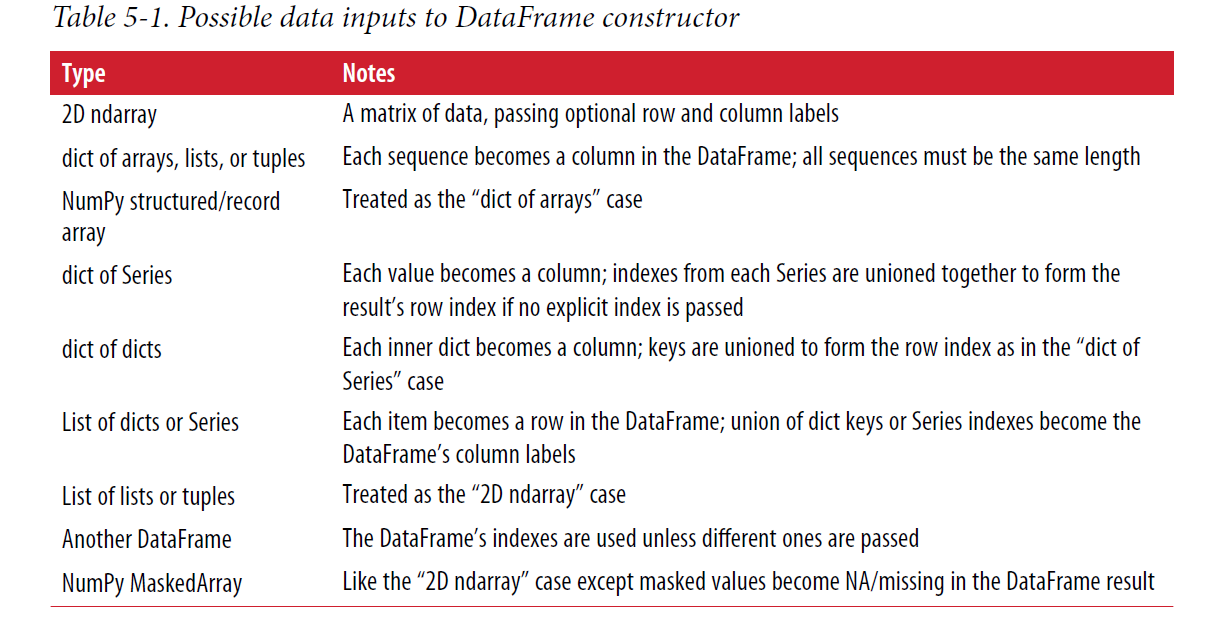

### func

#### reindex 对列进行制定顺序

In [16]:
#reindex
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [17]:
obj2 = obj.reindex(['a','b','c','d','e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [18]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
index=['a', 'c', 'd'],
columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [21]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [22]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [ ]:
frame.loc[['a','d'], ['Texas','California']]

In [ ]:
frame.reindex(index=['a','d'], columns=['Texas','California'])

In [25]:
frame.reindex?

#### drop 删除列

In [ ]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

In [ ]:
obj.drop(['a','e'])

In [ ]:
obj.drop('c',inplace=True)
obj

In [ ]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
.....: index=['Ohio', 'Colorado', 'Utah', 'New York'],
.....: columns=['one', 'two', 'three', 'four'])
data

In [ ]:
data.drop(['one','two'],axis=1)

In [ ]:
data.drop?

#### index loc iloc

In [ ]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
.....: index=['Ohio', 'Colorado', 'Utah', 'New York'],
.....: columns=['one', 'two', 'three', 'four'])
data

In [ ]:
#可以先获取column，再切片
column = data.columns
data[column[:3]]

In [ ]:
# loc 行列一起选
data.loc[['Ohio', 'Utah'], ['one','three']]

In [ ]:
#iloc  integer 数字下标
data.iloc[[0,2],[0,2]]

In [ ]:
#切片
data.iloc[0:2 , 0:2]

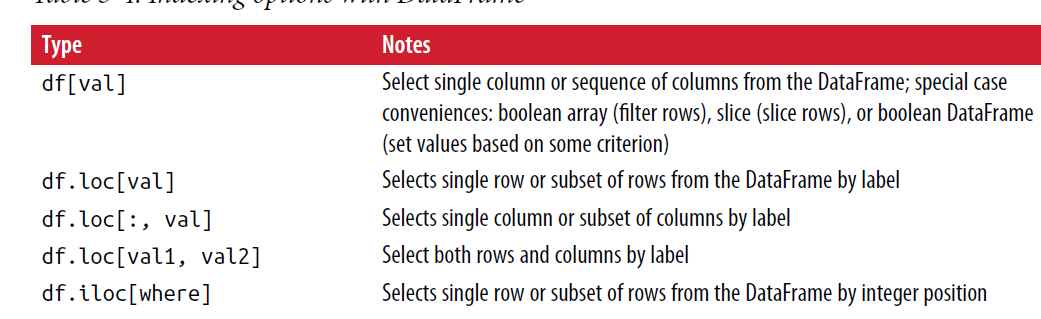

### 计算

series和dataframe都是按照index对应进行计算

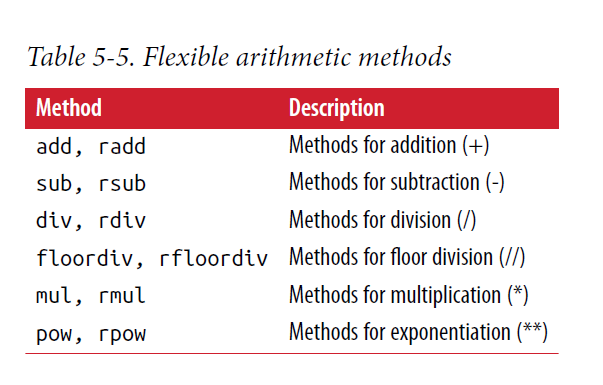

#### mapping apply

In [42]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
.....: index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,-1.209084,-0.066814,1.132124
Ohio,-0.149806,0.325967,0.206724
Texas,0.914832,-0.614645,-2.022201
Oregon,0.086802,-0.350434,0.870802


In [43]:
f = lambda x : x.max() - x.min()
frame.apply(f)
#默认axis = 'row',所以以行为整体，得到每一列的最大值-最小值

b    2.123915
d    0.940612
e    3.154326
dtype: float64

In [46]:
frame.apply(f, axis='columns')
#每一行

Utah      2.341208
Ohio      0.475773
Texas     2.937033
Oregon    1.221236
dtype: float64

In [47]:
#applymap 逐个元素操作
#保留两位小数
format_2 = lambda x: round(x,2)
frame.applymap(format_2)

,b,d,e
Utah,-1.21,-0.07,1.13
Ohio,-0.15,0.33,0.21
Texas,0.91,-0.61,-2.02
Oregon,0.09,-0.35,0.87


###  sort 排序

In [ ]:
#根据index排序
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
index=['three', 'one'],
columns=['d', 'a', 'b', 'c'])
frame

In [ ]:
frame.sort_index()#按行名排序

In [ ]:
frame.sort_index(axis=1)#列

In [ ]:
#根据value排排序
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

In [ ]:
frame.sort_values(by='b')#根据blie排序

In [ ]:
frame.sort_values(by=['a', 'b'])#a相同则排序b，与sql类似

## data loading & storage

### read.csv

In [ ]:
df = pd.read_csv('E:/pydata/examples/ex1.csv',sep = ',')

In [ ]:
df

In [ ]:
df1 = pd.read_csv('E:/pydata/examples/ex2.csv',sep = ',',header= None)
df1

In [ ]:
names = ['a', 'b', 'c', 'd', 'message']
pd.read_csv('E:/pydata/examples/ex2.csv', names=names, index_col='message')

In [ ]:
#NaN
res = pd.read_csv('E:/pydata/examples/ex5.csv',sep = ',')
res 

In [ ]:
res.isnull()

In [ ]:
#怎么算NA
pd.read_csv('E:/pydata/examples/ex5.csv',na_values=[1,5,'two'])

### reading in pieces

In [ ]:
result = pd.read_csv('E:/pydata/examples/ex6.csv')# 10000 x 5

In [ ]:
pd.read_csv('E:/pydata/examples/ex6.csv',nrows=10)

In [ ]:
pd.read_csv('E:/pydata/examples/ex1.csv')

In [ ]:
# chunk
chunker = pd.read_csv('E:/pydata/examples/ex1.csv',chunksize=2)

In [ ]:
for chunk in chunker:
    print(chunk['a'].sum())

### write

In [ ]:
data = pd.read_csv('E:/pydata/examples/ex5.csv')
data

In [ ]:
# write csv
data.to_csv('E:/pydata/write/out1.csv')
pd.read_csv('E:/pydata/write/out1.csv')

In [ ]:
# denote missing value
data.to_csv('E:/pydata/write/out2.csv',na_rep='NULL0')
pd.read_csv('E:/pydata/write/out2.csv')

In [ ]:
data.to_csv('E:/pydata/write/out3.csv',index=False, header=False)
pd.read_csv('E:/pydata/write/out3.csv',header=None)

In [ ]:
pd.read_csv('E:/pydata/examples/ex7.csv')

### sql

In [ ]:
import pymysql

# 1. 创建数据库连接对象
con = pymysql.connect(host='localhost', port=3501,db='myemployees',
                      user='root', password='100890')

cursor = con.cursor()
sql = 'select * from departments'
cursor.execute(sql)
#注意，返回tuple，要改成list
result = list(cursor.fetchall())#fetchone(), fetchmany(2)

head = cursor.description
# 涉及写操作要注意提交 conn.commit()
cursor.close()
con.close()

In [ ]:
pd.DataFrame(result, columns=[x[0] for x in head])

In [ ]:
head

## data cleaning and preparation

### missing data

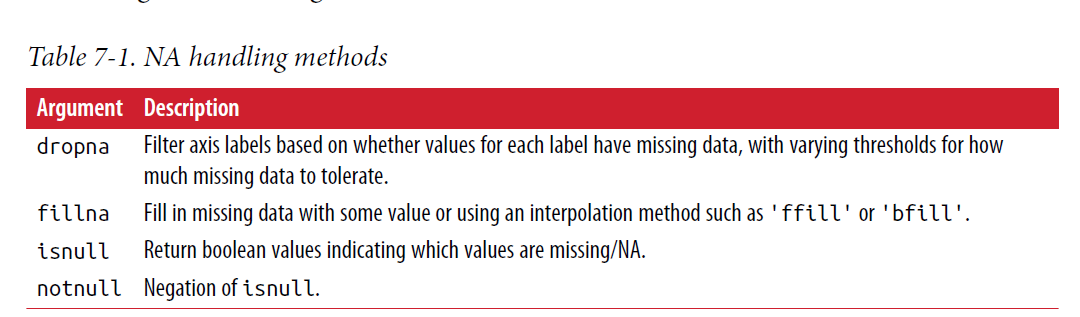

In [4]:
from numpy import nan as NA

In [ ]:
data = pd.Series([1, NA, 3.5, NA, 7])
data

##### dropna()

In [ ]:
#直接删除
data.dropna()

In [ ]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
 [NA, NA, NA], [NA, 6.5, 3.]])
data

In [ ]:
#默认删除含有na的行
data.dropna()

In [ ]:
data.dropna(how='all')#删除全为na的行，如果不是全部为na， NA会保留

In [ ]:
data.dropna(axis=1)

##### fillna() / ffill() 

In [8]:
df = pd.DataFrame(np.random.randn(7, 3), columns=list('abc'))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df

,a,b,c
0,-1.119415,NaN,NaN
1,0.125344,NaN,NaN
2,-0.713525,NaN,-0.175263
3,-0.826063,NaN,-0.509098
4,-0.728493,0.632549,-0.482562
5,0.351302,0.670048,0.674769
6,-0.839762,1.732694,-0.081346


In [ ]:
#Calling fillna with a dict, you can use a different fill value for each column
df.fillna({'b': 0.5, 'c': 0})

In [10]:
df = pd.DataFrame(np.random.randn(6, 3), columns=list('abc'))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
df

,a,b,c
0,0.211111,-0.427631,1.263464
1,-1.544822,-0.654514,2.006705
2,0.633919,NaN,0.277844
3,2.950691,NaN,-0.064070
4,-1.425850,NaN,NaN
5,-0.434794,NaN,NaN


In [ ]:
df.fillna(method='ffill')

In [ ]:
df.fillna(method='ffill', limit=2)

In [11]:
df.mean()

a    0.065042
b   -0.541072
c    0.870986
dtype: float64

In [12]:
df.fillna({'b': df['b'].mean(), 'c': df['c'].mean()})

,a,b,c
0,0.211111,-0.427631,1.263464
1,-1.544822,-0.654514,2.006705
2,0.633919,-0.541072,0.277844
3,2.950691,-0.541072,-0.064070
4,-1.425850,-0.541072,0.870986
5,-0.434794,-0.541072,0.870986


### data transformation

#### removing duplicted rows

In [13]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
 'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [14]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [ ]:
data.drop_duplicates()

In [ ]:
#按某一列去重
data.drop_duplicates(['k2'])

#### mapping

In [ ]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
....: 'Pastrami', 'corned beef', 'Bacon',
....: 'pastrami', 'honey ham', 'nova lox'],
....: 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

In [ ]:
meat_to_animal = {
'bacon': 'pig',
'pulled pork': 'pig',
'pastrami': 'cow',
'corned beef': 'cow',
'honey ham': 'pig',
'nova lox': 'salmon'
}
#全是小写

In [ ]:
lowercase = data['food'].str.lower()

In [ ]:
#The map method on a Series accepts a function or dict-like object containing a mapping
data['animal'] = lowercase.map(meat_to_animal)
data

In [ ]:
data['animal1'] = data['food'].map(lambda x: meat_to_animal[x.lower()])
data

#### rename index

In [ ]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
....: index=['Ohio', 'Colorado', 'New York'],
....: columns=['one', 'two', 'three', 'four'])
data

In [ ]:
#把index变大写
data.index = data.index.map(lambda x: x.upper())
data

In [ ]:
#rename 
data.rename(index={'OHIO': 'INDIANA'}, columns={'three': 'peekaboo'})

#### outliers

In [ ]:
data = pd.DataFrame(np.random.randn(1000, 4))
data

In [ ]:
data.describe()

In [ ]:
col = data[2]
col[np.abs(col) > 3]

In [ ]:
#To select all rows having a value exceeding 3 or –3, you can use the any method on a boolean DataFrame
#有大于3 的行
data[(np.abs(data) > 3).any(1)]

#### dummy

In [2]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'], 'data1': range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [ ]:
pd.get_dummies(df['key'])

### string manipulation

In [ ]:
val = 'a,b, guido'
pieces = [x.strip() for x in val.split(',')]#去除首尾空格
pieces

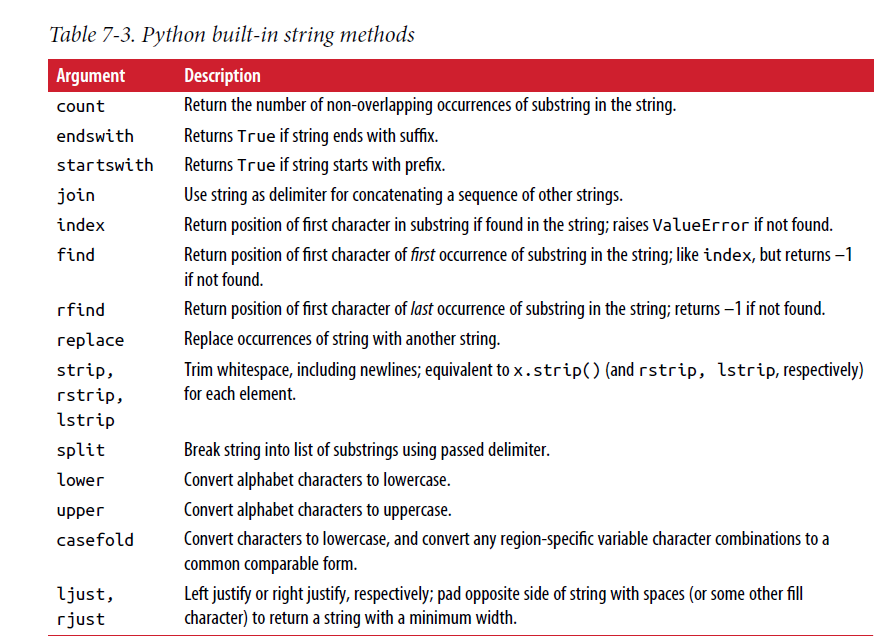

In [ ]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com', 'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = pd.Series(data)
data

## data join, combine, reshape 

### Hierarchical Indexing

In [ ]:
data = pd.Series(np.random.randn(9),
...: index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
...: [1, 2, 3, 1, 3, 1, 2, 2, 3]])
data

In [ ]:
data.index

In [ ]:
#变成df
data.unstack()

In [ ]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
....: index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
....: columns=[['Ohio', 'Ohio', 'Colorado'],
....: ['Green', 'Red', 'Green']])
frame

In [ ]:
frame.columns

#### reordering levels

In [ ]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

In [ ]:
frame.swaplevel('key1', 'key2')

#### statistics by level

In [ ]:
frame

In [ ]:
frame.sum(level='key2')

In [ ]:
frame.sum(level='color', axis=1)

### combining and merging

In [ ]:
类似SQL

## Plot

In [ ]:
%matplotlib notebook

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data = np.arange(10)
plt.plot(data)

### figure object

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
#直接在最后一个subplot上画
plt.plot(np.random.randn(50).cumsum(), 'k--')

ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(50), bins=8, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0.1, hspace=0.1)#调整subplot间距

### figure paramet

In [ ]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

#plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

<IPython.core.display.Javascript object>


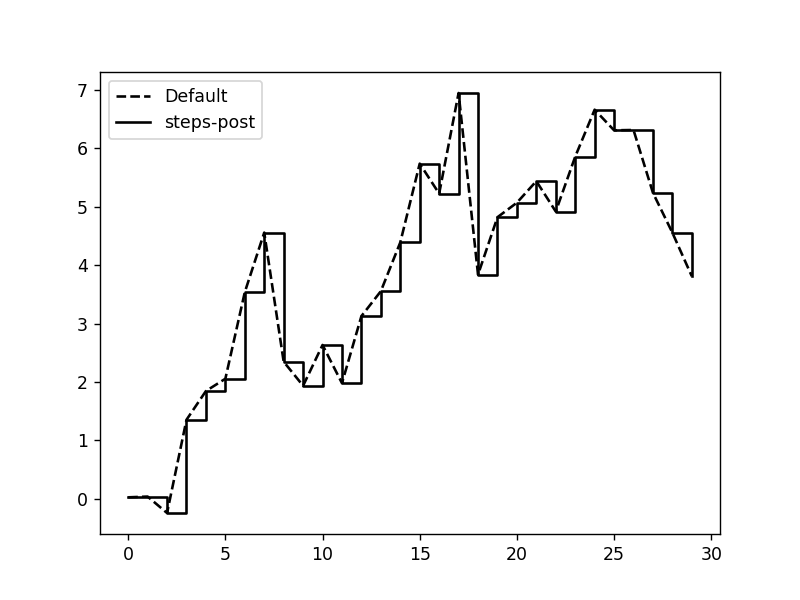

In [18]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')

plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

plt.legend()#加legend 图例

#### title, axis labels, ticks, and ticklabels

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [ ]:
ax.set_xlim([0, 1200])
ax.set_ylim([-50, 50])

In [ ]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [ ]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=60, fontsize='small')# small ，medium，large

In [ ]:
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')
ax.set_ylabel('Num')

In [ ]:
#bbox_inches, which can trim the whitespace around the actual figure.
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

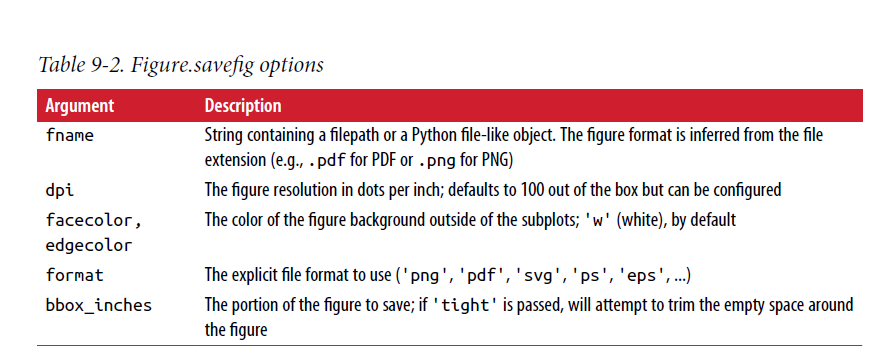

### seaborn

In [ ]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s

In [ ]:
fig = plt.figure()
s.plot()

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=['A', 'B', 'C', 'D'], index=np.arange(0, 100, 10))
df

In [ ]:
df.plot()

## data aggregation &group

### Group

In [2]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
....: 'key2' : ['one', 'two', 'one', 'two', 'one'],
....: 'data1' : np.random.randn(5),
....: 'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-1.437773,-0.015516
1,a,two,-1.080587,0.400218
2,b,one,-0.744434,-0.763651
3,b,two,-0.022361,-0.343836
4,a,one,0.710551,0.162902


In [8]:
#通过key1来计算data1 的 均值，即a一组，b一组
grouped = df[['data1']].groupby(df['key1'])

In [ ]:
grouped.mean()

In [ ]:
df['data1'].groupby(df['key1']).sum()

In [ ]:
#muti key
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

In [ ]:
means.unstack()

In [ ]:
df.groupby('key1').mean()

In [ ]:
df.groupby(['key1', 'key2']).mean()

In [ ]:
df.groupby('key1').size()

In [ ]:
df.groupby(['key1', 'key2']).size().unstack()

#### Iterating Over Groups

In [ ]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

In [ ]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

#### Grouping with Dicts and Series

In [10]:
people = pd.DataFrame(np.arange(25).reshape(5,5),
....: columns=['a', 'b', 'c', 'd', 'e'],
....: index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])

In [11]:
people.iloc[2, [1,2]] = np.nan
people

,a,b,c,d,e
Joe,0,1.0,2.0,3,4
Steve,5,6.0,7.0,8,9
Wes,10,NaN,NaN,13,14
Jim,15,16.0,17.0,18,19
Travis,20,21.0,22.0,23,24


In [12]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
....: 'd': 'blue', 'e': 'red'}
mapping


{'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red'}

In [ ]:
people.groupby(mapping, axis=1).sum()

#### Grouping with Functions

In [74]:
#会对index作用func，作为新的分组key，可输入axis=1对colums名作用
# 传入一个func， 会对每一行的行名index作用，得到的结果作为组名分组 index
#例子
data = pd.DataFrame({'height': [182,179,179], 'weight': [70,65,55], 'school': ['UIUC','UCB','UMD']}, index=['hsc', 'sl', 'wjq'])
data

,height,weight,school
hsc,182,70,UIUC
sl,179,65,UCB
wjq,179,55,UMD


In [31]:
#index是名字，按名字长度分类
g = data.groupby(len)
for x, y in g:
    print(x)
    print(y)

2
    height  weight school
sl     179      65    UCB
3
     height  weight school
hsc     182      70   UIUC
wjq     179      55    UMD


In [32]:
g.groups

{2: Index(['sl'], dtype='object'), 3: Index(['hsc', 'wjq'], dtype='object')}

In [34]:
g.get_group(3)

,height,weight,school
hsc,182,70,UIUC
wjq,179,55,UMD


In [75]:
#体重大于60kg的分组
def f(x):
    if x >= 60:
        return '60+'
    else:
        return '60-'
data['ge60'] = data['weight'].map(f)
data

,height,weight,school,ge60
hsc,182,70,UIUC,60+
sl,179,65,UCB,60+
wjq,179,55,UMD,60-


In [76]:
g = data.groupby(['ge60','height'])
for x, y in g:
    print(x)
    print(y)

('60+', 179)
    height  weight school ge60
sl     179      65    UCB  60+
('60+', 182)
     height  weight school ge60
hsc     182      70   UIUC  60+
('60-', 179)
     height  weight school ge60
wjq     179      55    UMD  60-


###  Data Aggregation

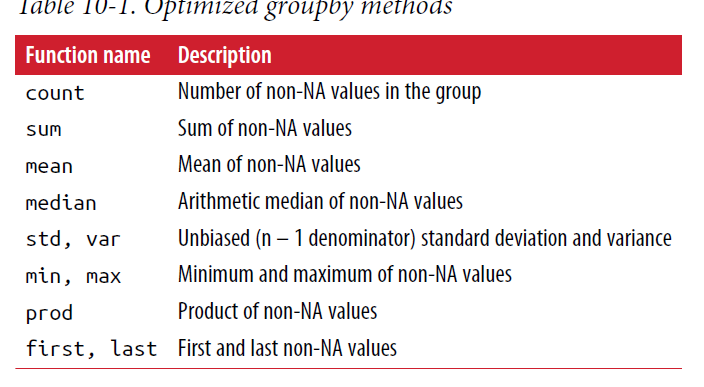

#### agg 是对一列操作(可对group对象作用)，得到一个值，  map是对一列中的每个元素做一个变换(操作)， apply可以对每一行或列进行一个操作

In [2]:
# 可以传入一个函数，返回一个单值
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [5]:
np.arange(8).reshape(4,2)

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [8]:
data = pd.DataFrame(np.arange(8).reshape(4,2), columns=['r1','r2'])
data

,r1,r2
0,0,1
1,2,3
2,4,5
3,6,7


In [20]:
data.agg(peak_to_peak)
#data.apply(peak_to_peak, axis=0)

r1    6
r2    6
dtype: int64

#### Column-Wise and Multiple Function Application

In [ ]:
tips = pd.read_csv('E:/pydata/examples/tips.csv')

In [ ]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

In [ ]:
grouped = tips.groupby(['day', 'smoker'])
grouped_pct = grouped['tip_pct']

In [ ]:
grouped_pct.agg('mean')#Note that for descriptive statistics like those in Table 10-1you can pass the name of the function as a string

In [ ]:
#If you pass a list of functions or function names instead, you get back a DataFrame with column names taken from the functions:
grouped_pct.agg(['mean', 'max', 'min', 'std'])

In [ ]:
grouped_pct.agg([('均值','mean'), 'max', 'min',('标准差', 'std')])

#### group apply   作用于group对象，返回可以不是单值

In [21]:
tips = pd.read_csv('E:/pydata/examples/tips.csv')

In [22]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240


In [24]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]

In [44]:
#以smoker分类，返回高的5个
g = tips.groupby('smoker').apply(top)
g.loc['Yes']

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

,total_bill,tip,smoker,day,time,size,tip_pct
smoker,,,,,,,
No,24.71,5.85,No,Thur,Lunch,2,0.236746


smoker                 
No      88   total_bill       24.71
             tip               5.85
             smoker              No
             day               Thur
             time             Lunch
             size                 2
             tip_pct       0.236746
        185  total_bill       20.69
             tip                  5
             smoker              No
             day                Sun
             time            Dinner
             size                 5
             tip_pct       0.241663
        51   total_bill       10.29
             tip                2.6
             smoker              No
             day                Sun
             time            Dinner
             size                 2
             tip_pct       0.252672
        149  total_bill        7.51
             tip                  2
             smoker              No
             day               Thur
             time             Lunch
             size                 2
    

In [45]:
g.index

MultiIndex(levels=[['No', 'Yes'], [51, 67, 88, 109, 149, 172, 178, 183, 185, 232]],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1], [2, 8, 0, 4, 9, 3, 7, 1, 6, 5]],
           names=['smoker', None])

In [26]:
#分类，每一类取最高的一个数据，bill
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

## Time series

### Date and Time Data Types and Tools

In [ ]:
from datetime import datetime

In [ ]:
now = datetime.now()
now

In [ ]:
now.year, now.month

In [ ]:
#时间间隔
delta = datetime(2020, 6 , 7) - datetime(1997, 9, 6)
delta

In [ ]:
delta.days

### Converting Between String and Datetime

In [ ]:
stamp = datetime(2019, 1, 3)
str(stamp)

In [ ]:
stamp.strftime('%Y-%m-%d')

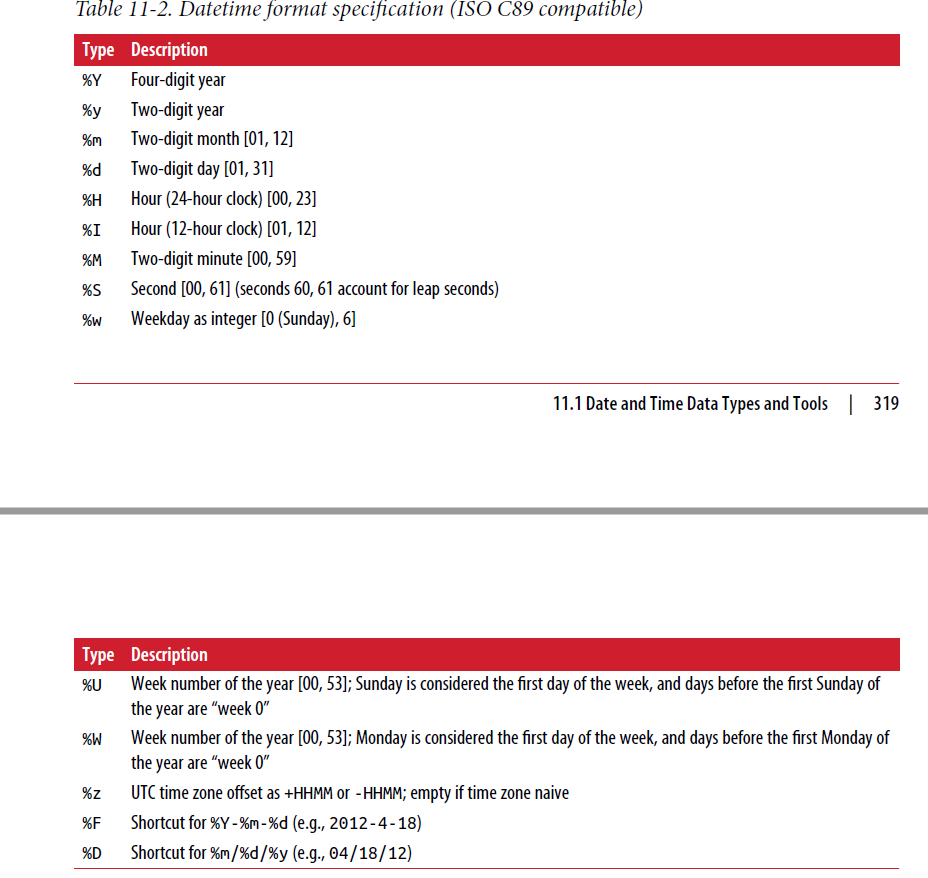

In [ ]:
stamp.strftime('%D')

In [ ]:
#string - datetime
value = '1997-09-06'
datetime.strptime(value, '%Y-%m-%d')

In [ ]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

In [2]:
arr = np.arange(12).reshape(4,3)

In [6]:
import pandas.DataFrame
DataFrame(arr)

ModuleNotFoundError: No module named 'pandas.DataFrame'

In [8]:
__builtin__

<module 'builtins' (built-in)>

In [11]:
dir(__builtins__)

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIteration',
 'StopIter